<h1 style="font-size:40px;"><center>Exercise II:<br> Model selection with MLPs
</center></h1>


# Short summary
In this exercise you will: 

* train MLPs and for both classification and regression problems and perform model selection to optimize validation performance

There are 10 questions in this exercise. These 10 questions can be found in five different cells below (see section "The Different Cells"). All of the exercises deal with training and evaluation of the multi-layer perceptron (MLP) network. You are going to work with different datasets, binary and multiple classification problems and a regression problem. For questions 1-6, code is available that you can run directly or only need to make small modifications to. For questions 7-10 we only provide parts of the code and you should add the rest. However, it is typically just a matter of paste and copy from the previous code cells (in a proper way).

You should write the report of the exercise within this notebook. The details of how to do that can be found below in section "Writing the report". Finally before you start:

**Deadline for submitting the report: December 10, 13:00 (2021)**

## The data
There are several datasets in this exercise. 

### syn2
The *syn2* dataset represents a binary classification problem. The input data is 2D which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. The dataset is generated "on the fly" each time. Data are generated from various normal distributions. Since they are generated using random numbers it means that each time you generate the data it will be slightly different from next time. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot the *syn2* dataset.

Note: This is the same dataset as in exercise 1.

### regr2
There is also a synthetic regression problem, called *regr2*. It has 6 inputs (independent variables) and one output variable (dependent variable). It is generated according to the following formula:  

$\qquad d = 2x_1 + x_2x_3^2 + e^{x_4} + 5x_5x_6 + 3\sin(2\pi x_6) + \alpha\epsilon$  
    
where $\epsilon$ is added normally distributed noise and $\alpha$ is a parameter controlling the size of the added noise. Variables $x_1,...,x_4$ are normally distrubuted with zero mean and unit variance, whereas $x_5, x_6$ are uniformly distributed ($[0,1]$). The target value $d$ has a non-linear dependence on ***x***.

### Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

### Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29. 
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. This is, in summary, a 9-class classification problem with 12 input values for each case.

### Bioconcentration dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/QSAR+Bioconcentration+classes+dataset* In short, this is a dataset of manually-curated bioconcentration factors (BCF) for 779 chemicals used to determine the mechanisms of bioconcentration, i.e. to predict whether a chemical: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated. Data were randomly split into a training set of 584 compounds (75%) and a test set of 195 compounds (25%), preserving the proportion between the classes. The independent variables consist of 9 molecular descriptors. This is, in summary, a 3-class classification problem with 9 input values for each case.

## The questions
There are 10 questions, where the first 3 questions are dealing with 2D binary classification problems. Here you will be able to see the boundary implemented by the different MLPs that you train. Questions 4-6 deals with training a regression network for the *regr2* dataset. Question 7-8 deals with Japanese vowels classification problem, here your task is to come up with a model that optimizes the validation result. Question 9 is for the Bioconcentration dataset, and again you should come up with a good model. Finally, the last question is to find a model that can solve the spiral problem.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | MLP | Needed | Defines the MLP model |
| 3 | Data | Needed | Defines the functions to generate the artificial datasets |
| 4 | PlotData | Information | Plots the 2D classification datasets |
| 5 | Statistics | Needed | Defines the functions that calculates various performance measures |
| 6 | Boundary | Needed | Function that can show 2D classification boundaries | 
| 7 | Confusion | Needed | Functions that plots the confusion matrix | 
| 8 | Ex1 | Exercise | For question 1-3 |
| 9 | Ex2 | Exercise | For question 4-6 |
| 10 | Ex3 | Exercise | For question 7-8 |
| 11 | Ex4 | Exercise | For question 9 |
| 12 | Ex5 | Exercise | For question 10 |

In order for you to start with the exercise you need to run all cells with the celltype "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" or "Run all above" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be effective in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun!

---

### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries

In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import metrics, regularizers, optimizers
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import scipy as sp
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, log_loss, classification_report
import pandas as pd

### CellName: MLP (#2)
### CellType: Needed
### Cell instruction: Defining the MLP model

This cell defines the MLP model. There are a number of parameters that is needed to 
define a model. Here is a list of them: 


* inp_dim: the input dimension (integer)

* n_nod: size of the network, eg [5] for a one hidden layer with 5 nodes and [5,3] for a two layer network with 5 and 3 hidden nodes each.

* drop_nod: Dropout parameter for each hidden layer. You can specipty a single number that will be used for all hidden layers. If you want different dropout parameters for each hidden layer, then specify as a list. Example, for a two hidden layer network drop_nod = [0.5, 0.75] means drop hidden nodes with probability 0.5 and 0.75 for the first and the second hidden layer, respectively. Note that we do not use dropout on the input nodes! Also, a value of 0 means no dropout (i.e. zero probability of removing a node).

* act_fun: the activation function. Most common are
    * 'linear'
    * 'relu'
    * 'tanh'
    * 'sigmoid'
        
* out_act_fun: the activation function for the output nodes. Most common are
    * 'linear'
    * 'sigmoid'
    * 'softmax'
    
* opt_method: The error minimization method. Common choices
    * 'SGD'
    * 'Adam'
    * 'Nadam'
    * 'RMSprop'
    
* cost_fun: The error function used during training. There are three common ones
    * 'mean_squared_error'
    * 'binary_crossentropy'
    * 'categorical_crossentropy'

* lr_rate: The learning rate. 

* metric: The metric to use besides the loss. Common values
    * accuracy
    * mse

* lambd: L2 regularization parameter

* num_out: The number of output nodes

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
def mlp(inp_dim,
            n_nod,
            drop_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            metric = 'accuracy',
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for i, nod in enumerate(n_nod):
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        if type(drop_nod) is list: 
            X = Dropout(drop_nod[i])(X)
        else: 
            X = Dropout(drop_nod)(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate),
                  loss = cost_fun,
                  metrics=[metric])       
    
    return model



### CellName: Data (#3)
### CellType: Needed
### Cell instruction: Defining synthetic data sets

This cell defines the different synthetic data sets. It also provides functions for reading the Vowles dataset, the Bioconcentration dataset and the Spiral data. The last function is used for standardization of the data. 

Run the cell by entering into the cell and press "CTRL Enter".

In [3]:
def syn2(N):
    
    global seed
     
    x = np.empty(shape=(N,2), dtype = np.float32)  
    d = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    x[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))

    # Negative samples 
    x[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    # Target
    d[:N1] = np.ones(shape=(N1,))
    d[N1:] = np.zeros(shape=(N-N1,))

    return x,d


def regr2(N, v=0):

    global seed

    x = np.empty(shape=(N,6), dtype = np.float32)  
    
    uni = lambda n : np.random.uniform(0,1,n)
    norm = lambda n : np.random.normal(0,1,n)
    noise =  lambda  n : np.random.normal(0,1,n)
    
    
    for i in range(4):
        x[:,i] = norm(N)
    for j in [4,5]:
        x[:,j] = uni(N)
    
    d =   2*x[:,0] + x[:,1]* x[:,2]**2 + np.exp(x[:,3]) + \
            5*x[:,4]*x[:,5]  + 3*np.sin(2*np.pi*x[:,5])
    std_signal = np.std(d)
    d = d + v * std_signal * noise(N)
        
    return x, d

def twospirals(n_points, turns = 3, noise=0.5):
    """
     Returns the two spirals dataset.
    """
    n = (np.random.rand(n_points,1)*0.95+0.05) * turns * (2*np.pi)
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

def vowels():
    
    def pre_proc(file_name):
        block = []
        x = []
    
        with open(file_name) as file:
            for line in file:    
                if line.strip():
                    numbers = [float(n) for n in line.split()]
                    block.append(numbers)
                else:
                    x.append(block)
                    block = []
                
        ################################
        x = [np.asarray(ar) for ar in x]    
        return x

    x_trn = pre_proc('ae.train')
    x_tst = pre_proc('ae.test')

    
    ############## LABELS###########
    chunk1 = list(range(30,270, 30))
    d_trn = []
    person = 0

    for i, block in enumerate(x_trn):
        if i in chunk1:
            person += 1
        d_trn.extend([person]*block.shape[0])
        
    chunk2 = [31,35,88,44,29,24,40,50,29]
    chunk2 = np.cumsum(chunk2)
    d_tst = []
    person = 0
    for i, block in enumerate(x_tst):
        if i in chunk2:
            person += 1
        d_tst.extend([person]*block.shape[0])

    x_trn = np.vstack(x_trn)
    x_tst = np.vstack(x_tst)
    
    ## Split into train, validation and test
    num_classes = 9
    d_trn = keras.utils.to_categorical(d_trn, num_classes)
    d_tst = keras.utils.to_categorical(d_tst, num_classes)

    from sklearn.model_selection import train_test_split
    x_tst, x_val, d_tst, d_val = train_test_split(x_tst, d_tst, test_size=0.4, random_state=41)

    return x_trn, d_trn, x_val, d_val, x_tst, d_tst

def bcf():

    bcf_trn = pd.read_csv("Grisoni_trn.csv", delimiter='\t')
    bcf_tst = pd.read_csv("Grisoni_tst.csv", delimiter='\t')

    x_trn = bcf_trn.iloc[:,3:12].values.astype(np.float32)
    d_trn = bcf_trn.iloc[:,12].values.astype(np.float32) - 1.0
    d_trn = keras.utils.to_categorical(d_trn, 3)

    x_tst = bcf_tst.iloc[:,3:12].values.astype(np.float32)
    d_tst = bcf_tst.iloc[:,12].values.astype(np.float32) - 1.0
    d_tst = keras.utils.to_categorical(d_tst, 3)
    
    return x_trn, d_trn, x_tst, d_tst

def standard(x):
    return np.mean(x, axis=0) , np.std(x, axis=0)
    

### CellName: PlotData (#4)
### CellType: Information
### Cell instruction: Plotting the data

Here we just generate 100 cases for syn2 and the spiral dataset and plot them. 

Run the cell by entering into the cell and press "CTRL Enter". 

**Note!** This cell is not needed for the actual exercises, it is just to visualize the four different 2D synthetic classification data sets.

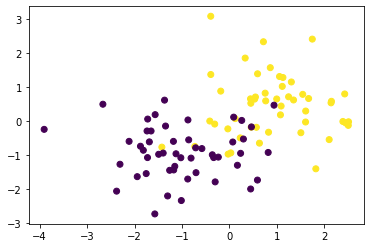

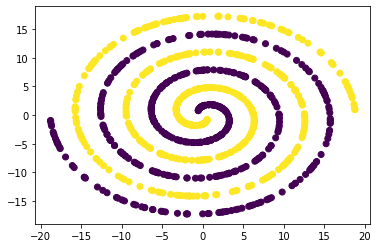

In [4]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

x,d = syn2(100)
plt.figure(2)
plt.scatter(x[:,0],x[:,1], c=d)

x,d = twospirals(500, 3, 0)
plt.figure(4)
plt.scatter(x[:,0],x[:,1], c=d)


### CellName: Statistics (#5)
### CellType: Needed
### Cell instruction: Present result for both classification and regression problems

This cell defines two functions that we are going to call using a trained model to calculate both error and performance measures. 

Run the cell by entering into the cell and press "CTRL Enter".

In [5]:
def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    sens = tp / nof_p
    spec = tn / nof_n
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Sensitivity', 'Specificity', 'Loss']
    B = [acc, sens, spec, loss[0]]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.4f}'.format(A[i], B[i]))

    return print('\n','#'*50)

def stats_reg(d = None, d_pred = None, label = 'Training', estimat = None):
    
    A = ['MSE', 'CorrCoeff']
    
    pcorr = np.corrcoef(d, d_pred)[1,0]
    
    if label.lower() in ['training', 'trn', 'train']:
        mse = estimat.history['loss'][-1]
    else:
        mse = estimat.history['val_loss'][-1] 

    B = [mse, pcorr]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.10f}'.format(A[i], B[i]))

    return print('\n','#'*50)


### CellName: Confusion (#6)
### CellType: Needed
### Cell Instruction: Plot the confusion matrix

This cell defines the functions need to plot a confusion matrix. A confusion matrix is a summary of the predictions made by a classifier. Each column of the matrix represents the instances of the predicted class while each row represents the instances of the actual class. The function 'plot_confusion_matrix' does the actual plotting, while the 'make_cm_plot' is the one that should be called from the user. See example of usage in the exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [6]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def make_cm_plot(model,
            inp,
            trg,
            num_classes,
            label='Test data'):
    
    print('\n','#'*10,'Result for {}'.format(label), '#'*10, '\n')

    y = model.predict(inp, verbose=0 )
    print('log_loss:   ', '{:.4f}'.format(log_loss(trg, y, eps=1e-15)))

    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    print('accuracy:   ', '{:.4f}'.format((y_class==d_class).mean()), '\n')

    class_names = ['class {}'.format(i+1) for i in range(num_classes)]
    print(classification_report(d_class, y_class, target_names=class_names))

    confuTst = confusion_matrix(d_class, y_class)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = class_names,
                          title        = "Confusion Matrix")

    

### CellName: Boundary (#7)
### CellType: Needed
### Cell Instruction: Decision boundary

This cell defines the function to plot the decision boundary for a 2D input binary MLP classifier. 

Run the cell by entering into the cell and press "CTRL Enter".

In [7]:
def decision_b(X, Y1, model ):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # grid stepsize
    h = 0.025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    Z[Z>.5] = 1
    Z[Z<= .5] = 0

    Y_pr = model.predict(X, batch_size = X.shape[0], verbose=0).reshape(Y1.shape)
  
    Y = np.copy(Y1)
    Y_pr[Y_pr>.5] = 1
    Y_pr[Y_pr<= .5] = 0
    Y[(Y!=Y_pr) & (Y==0)] = 2
    Y[(Y!=Y_pr) & (Y==1)] = 3
    
    
    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha = .9) 
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker='+', c='k')
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker='o', c='k')
       
    plt.scatter(X[:, 0][Y==3], X[:, 1][Y==3], marker = '+', c='r')   
    plt.scatter(X[:, 0][Y==2], X[:, 1][Y==2], marker = 'o', c='r')
    
    
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.show()


---
End of "Needed" and "Information" cells. Below are the cells for the actual exercise.

---

### CellName: Ex1 (#8)
### CellType: Exercise
### Cell instruction: Instruction for question 1-3

The cell below should be used for questions 1-3. For question 1 you can run the cell as it is (i.e. CTRL-Return). For the other questions you need to modify the cell in order to change hyper parameters etc. 

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance?  For classification problems we will provide 4 different measurements as returned by a call to the *stats_class* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* loss = cross-entropy error (so low loss means good performance!)

For the questions in this exercise, accuracy is an appropriate performance measure.

#### Question 1
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation data points. 

Now, use *syn2*(100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?** 

**Note:** Use a fixed random seed for this exercise since you will compare with runs in the next questions.

**Hint:** Remember for the first computer exercise that you should average over a few trained models.

#### Question 2
You are now going to train this model to a high training accuracy! By increasing the number of hidden nodes we should be able to get better and better training performance. **(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?** **(b) What is the performance on the validation data set?**

**Hint:** Remember from the first computer exercise that overtraining often means finding good local minimum of the loss function, which may require some tuning of the hyper parameters that controls the training. This means that you may have to change the learning rate, batch size and the number of epochs. Since the *Adam* method is usually better than the vanilla *stochastic gradient descent*, it is therefore used in the cells below as the default minimizer. 

#### Question 3
However, we are almost always interested in optimal validation performance. You should now find the number of hidden nodes that optimize the validation performance. **(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** **(b) Try to give an explanation for the number you obtained?**


Model: "functional_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_88 (Dense)             (None, 3)                 9         
_________________________________________________________________
dropout_44 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________

 ########## STATISTICS for Training Data ########## 

Accuracy        0.8800
Sensitivity     0.8200
Specificity     0.9400
Loss            0.2555

 ##################################################

 ########## STATISTICS for Validation Data ########## 

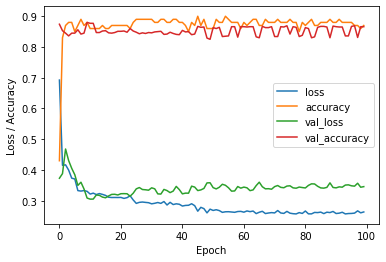

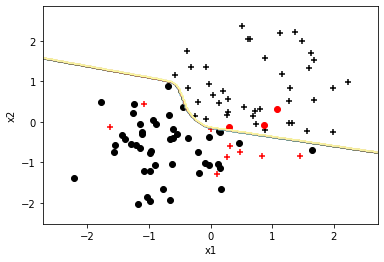

Wall time: 3.29 s


In [52]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn2(100)
x_val, d_val = syn2(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],     
         'n_nod':[3],
         #'n_nod': [4,3,2,1],                      # architecture
         #'n_nod': [3,2,2,2],  
         #'n_nod':[10],
         #'n_nod': [7,7,4,2],  
         #'n_nod':[300],
         'drop_nod': 0.0,                   # dropout specification
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         #'lr_rate': 0.03 ,
         #'lr_rate': 0.05 ,                  # learningrate
         #'lr_rate': 0.09 ,                  # learningrate
         #'lr_rate': 0.9 ,
         'lr_rate': 0.7 ,
         #'lr_rate': 0.06 ,
         'num_out' : 1 }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_ex1 = mlp(**INPUT)

# Print a summary of the model
model_ex1.summary()

# Train the model
estimator_ex1 = model_ex1.fit(x_trn, d_trn,
                      epochs = 100, 
                      #epochs = 50, 
                      #epochs = 40,    
                      validation_data=(x_val, d_val),
                      #batch_size=19,
                      batch_size=50,
                      #batch_size=70,
                      #batch_size=25,
                      verbose = 0)

# Call the stats function to print out statistics for classification problems
stats_class(x_trn, d_trn, 'Training', model_ex1)
stats_class(x_val, d_val, 'Validation', model_ex1)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_trn, d_trn, model_ex1)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
#decision_b(x_val, d_val)


### CellName: Ex2 (#9)
### CellType: Exercise
### Cell instruction: Instruction for question 4-6

Now we are going to look at a regression problem. The data as described above (regr2) consists of 6 inputs (features) and one output (target) value. As for the previous exercise a new data set is generated each time you call the *regr2* function. To get exactly the same data set between different calls, use a fixed seed. For this problem we can control the amount of noise added to the target value. We are going to use a relatively small training dataset (250) and a larger validation dataset (1000) to get a more robust estimation of the generalization performance, and 0.4 units of noise. For regression problems we also need new performance measures. The *stats_reg* function will give you two such measures:
* MSE = mean squared error (low error mean good performance)
* CorrCoeff = Pearson correlation coefficient for the scatter plot between predicted and true values.

The cell below can be used as an template for all questions regarding this regression problem.

#### Question 4
*Model selection based on the number of hidden nodes (in a single hidden layer).* Find the number of hidden nodes that gives best validation performance. **How many hidden nodes do you find that gives best validation performance?** Make a note of the best validation MSE (or correlation coefficient) you get.

**Hint:** A good strategy is to start with a "small" model and increase the number of hidden nodes and monitor the validation result. 

#### Question 5
*Model selection based on L2 (weight decay).* Instead of using the number of hidden nodes to control the complexity we can use a regularization term added to the error function. You are going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell). For the L2 regularization to make sense we need a start model that is capable being overtrained. The suggestion is to use at least twice as many hidden nodes for this question compared to what you found in Q4. You should modify the *L2* value until you find optimal validation performance. **(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4?**


#### Question 6
*Model selection based on dropout.* Instead of using the *L2* regularizer we can use dropout. In short, repeat Q5, but use the *dropout* parameter instead. **(a) Present your optimal model (dropout value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4/Q5?** 

**Hint:** Using dropout may require even more hidden nodes to start with! 

#### Extra question
The extra questions is provided if you have extra time. **These question are not required for the course and does not influence any grading.** 

Repeat Q4-Q6 using two hidden layers.


Model: "functional_147"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 6)]               0         
_________________________________________________________________
dense_146 (Dense)            (None, 500)               3500      
_________________________________________________________________
dropout_73 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_147 (Dense)            (None, 1)                 501       
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________

 ########## STATISTICS for Training Data ########## 

MSE             0.3422046900
CorrCoeff       0.9146785285

 ##################################################

 ########## STATISTICS for Validation Data ########## 

MSE             0.5320606

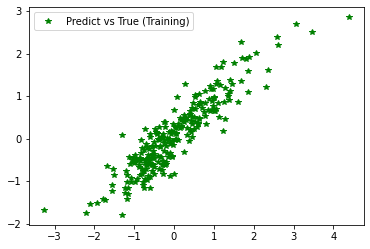

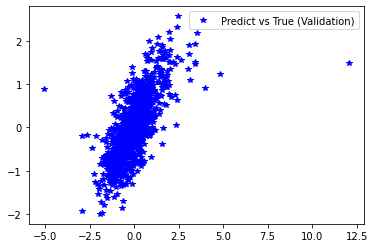

Wall time: 10.9 s


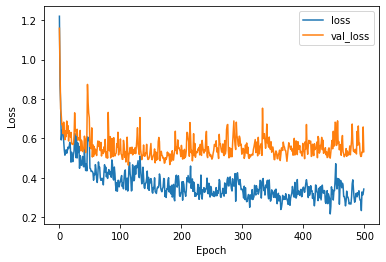

In [81]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 9
np.random.seed(seed) if seed else None

# Generate training and validation data
x_trn, d_trn = regr2(250, 0.4)
x_val, d_val = regr2(1000, 0.4)

# Standardization of both inputs and targets
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

mu, std = standard(d_trn)
d_trn = (d_trn - mu) / std
d_val = (d_val - mu) / std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [500],                  
         'drop_nod': 0.3,                
         'act_fun': 'tanh',             
         'out_act_fun': 'linear',      
         'opt_method': 'Adam',         
         'cost_fun': 'mse',  
         #'lr_rate': 0.04,  
         'lr_rate': 0.025,            
         'metric': 'mse',              
         'lambd' : 0.0,
         #'lambd' : 0.01, #L2 regularization term
         'num_out' : 1 }    

# Get the model
model_ex2 = mlp(**INPUT)

# Print a summary of the model
model_ex2.summary()
    
# Train the model
estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                      epochs = 500,                     
                      validation_data=(x_val,d_val),
                      batch_size=50,                    
                      verbose = 0)

# Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

# Scatter plots of predicted and true values
plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()


# Training history
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Epoch')
for k in ['loss', 'val_loss']:
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')

### CellName: Ex3 (#10)
### CellType: Exercise
### Cell instruction: Instruction for question 7-8

For this exercise you are given a classification problem with a fixed training-, validation- and test dataset. The data is the Japanse vowels dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We provide less code here, normalization of the input data and the definition of the MLP is missing. You need to provide that on your own.

#### Question 7
**Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.**

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

#### Question 8
The typical goal is to have a high accuracy (i.e. the fraction of correctly classified cases). During training we typically monitor possible overtraining by looking at the *loss* of the validation data, since this is the error used during training. One can however have a situation where the loss increases for the validation data but the accuracy stays constant (**why?**). **Given this situation, what would be your criteria to select the best model?** 


Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 12)]              0         
_________________________________________________________________
dense_37 (Dense)             (None, 28)                364       
_________________________________________________________________
dropout_26 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 28)                812       
_________________________________________________________________
dropout_27 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 9)                 261       
Total params: 1,437
Trainable params: 1,437
Non-trainable params: 0
___________________________________________________

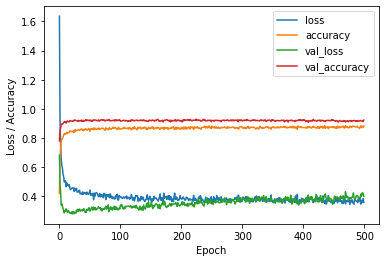


 ########## Result for Training data ########## 

log_loss:    0.1368
accuracy:    0.9551 

              precision    recall  f1-score   support

     class 1       0.98      0.98      0.98       542
     class 2       0.93      0.89      0.91       465
     class 3       0.95      0.92      0.93       424
     class 4       0.92      0.98      0.95       606
     class 5       0.95      0.96      0.96       397
     class 6       1.00      1.00      1.00       523
     class 7       1.00      0.99      1.00       506
     class 8       0.87      0.89      0.88       377
     class 9       0.98      0.94      0.96       434

    accuracy                           0.96      4274
   macro avg       0.95      0.95      0.95      4274
weighted avg       0.96      0.96      0.96      4274



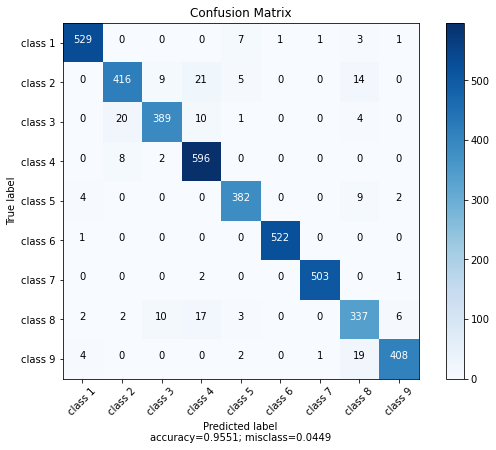


 ########## Result for Validation data ########## 

log_loss:    0.3996
accuracy:    0.9231 

              precision    recall  f1-score   support

     class 1       0.94      0.96      0.95       214
     class 2       0.86      0.86      0.86       203
     class 3       0.96      0.94      0.95       467
     class 4       0.93      0.93      0.93       365
     class 5       0.93      0.91      0.92       158
     class 6       0.98      0.98      0.98       169
     class 7       0.96      0.96      0.96       281
     class 8       0.84      0.86      0.85       264
     class 9       0.88      0.88      0.88       154

    accuracy                           0.92      2275
   macro avg       0.92      0.92      0.92      2275
weighted avg       0.92      0.92      0.92      2275



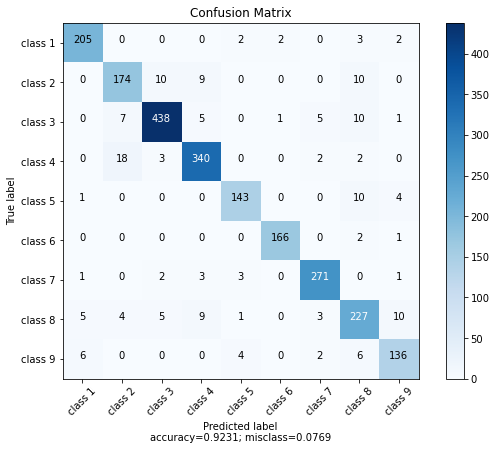


 ########## Result for Testing data ########## 

log_loss:    0.3293
accuracy:    0.9235 

              precision    recall  f1-score   support

     class 1       0.95      0.95      0.95       340
     class 2       0.86      0.85      0.85       323
     class 3       0.95      0.93      0.94       723
     class 4       0.93      0.94      0.94       502
     class 5       0.93      0.93      0.93       227
     class 6       0.97      1.00      0.98       271
     class 7       0.99      0.97      0.98       383
     class 8       0.82      0.86      0.84       370
     class 9       0.89      0.88      0.89       273

    accuracy                           0.92      3412
   macro avg       0.92      0.92      0.92      3412
weighted avg       0.92      0.92      0.92      3412



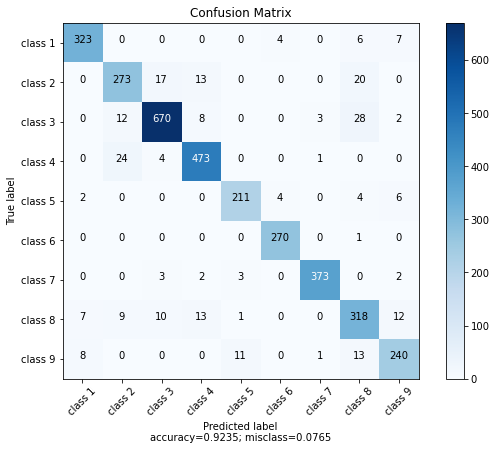

Wall time: 27.2 s


In [19]:
%%time

# Load the data
x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()

# YOUR CODE FOR NORMALIZATION
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

#mu, std = standard(x_val)
x_val = (x_val - mu)/std

#mu, std = standard(x_tst)
x_tst = (x_tst - mu)/std

num_classes = 9

# YOUR CODE THAT DEFINES THE MLP
# INPUT = 
# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1], 
         #'n_nod':[20,20],
         #'n_nod':[22,22],
         #'n_nod':[24,24],
         'n_nod':[28,28],
         #'n_nod': [40,30,30,30],   
         'drop_nod': 0.4,  
         'act_fun': 'relu',             
         'out_act_fun': 'softmax',      
         'opt_method': 'Adam',         
         'cost_fun':'categorical_crossentropy',             
         'lr_rate': 0.01,    
         'metric': 'accuracy',              
         'lambd' : 0.0,
         'num_out' : 9 }    


# Get the model
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      epochs = 500,     
                      validation_data=(x_val,d_val),
                      batch_size=100,          
                      verbose = 0)

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_vowels.history.keys():
    plt.plot(estimator_vowels.history[k], label = k) 
plt.legend()
plt.show()

# plot the confusion matrix
make_cm_plot(model_vowels, x_trn, d_trn, num_classes, 'Training data')
make_cm_plot(model_vowels, x_val, d_val, num_classes, 'Validation data')
make_cm_plot(model_vowels, x_tst, d_tst, num_classes, 'Testing data')

### CellName: Ex4 (#11)
### CellType: Exercise
### Cell instruction: Instruction for question 9

For this exercise you are given a classification problem with a fixed training and test dataset. The data is the Bioconcentraion dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We do not provide any python code for this question, only the small part that reads the data (next code cell).

#### Question 9
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.** For this classification task there are not so many cases of class 2. In the training data there is: class 1: 345 cases, class 2: 48 cases, and class 3: 191 cases. One can end upp with situations that the network does not at all learn how to detect cases of class 2. **(b) What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?**  

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
Since there is no defined validation data set you need to split your original training data into training and validation data. You can use *sklearn.model_selection.train_test_split* or *sklearn.model_selection.KFold* to accomplish that, where the latter method does k-fold crossvalidation splits.

**Hint 3:** 
This problem is a 3-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).


Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 9)]               0         
_________________________________________________________________
dense_54 (Dense)             (None, 25)                250       
_________________________________________________________________
dropout_38 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 24)                624       
_________________________________________________________________
dropout_39 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 3)                 75        
Total params: 949
Trainable params: 949
Non-trainable params: 0
_______________________________________________________

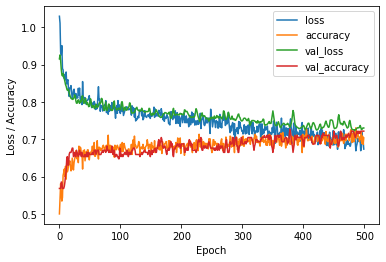


 ########## Result for Training data ########## 

log_loss:    0.6386
accuracy:    0.7353 

              precision    recall  f1-score   support

     class 1       0.71      0.94      0.81       245
     class 2       1.00      0.33      0.50        33
     class 3       0.80      0.45      0.58       130

    accuracy                           0.74       408
   macro avg       0.84      0.58      0.63       408
weighted avg       0.76      0.74      0.71       408



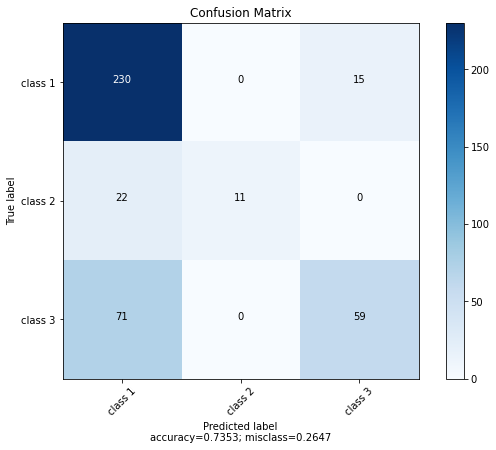


 ########## Result for Validation data ########## 

log_loss:    0.7300
accuracy:    0.7216 

              precision    recall  f1-score   support

     class 1       0.69      0.98      0.81       100
     class 2       0.80      0.27      0.40        15
     class 3       0.89      0.41      0.56        61

    accuracy                           0.72       176
   macro avg       0.79      0.55      0.59       176
weighted avg       0.77      0.72      0.69       176



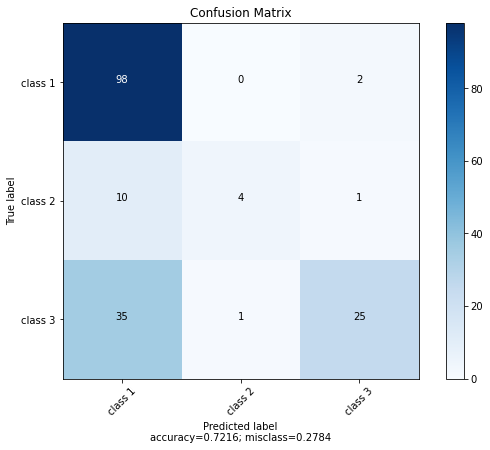


 ########## Result for Testing data ########## 

log_loss:    0.8156
accuracy:    0.6308 

              precision    recall  f1-score   support

     class 1       0.63      0.92      0.75       115
     class 2       1.00      0.25      0.40        16
     class 3       0.57      0.20      0.30        64

    accuracy                           0.63       195
   macro avg       0.73      0.46      0.48       195
weighted avg       0.64      0.63      0.57       195



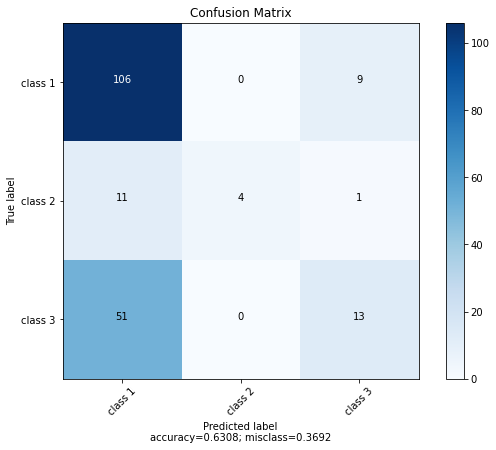

Wall time: 8.47 s


In [24]:
%%time
from sklearn.model_selection import train_test_split

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

# Load Bioconcentration training and test data
x_trn, d_trn, x_tst, d_tst = bcf()
x_trn, x_val, d_trn, d_val = train_test_split(x_trn,d_trn,
                                              test_size = 0.3,random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(
#...     X, y, test_size=0.33, random_state=42)

# YOUR CODE HERE
# YOUR CODE FOR NORMALIZATION
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
#mu, std = standard(x_val)
x_val = (x_val - mu)/std
#mu, std = standard(x_tst)
x_tst = (x_tst - mu)/std

num_classes = 3

# YOUR CODE THAT DEFINES THE MLP
# INPUT = 
# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],     
         #'n_nod':[20,20],
         'n_nod': [25,24],
         #'n_nod': [10,10,10,10],   
         #'n_nod': [20,20,20,20],    
         'drop_nod': 0.4,                
         'act_fun': 'sigmoid',             
         'out_act_fun': 'softmax',      
         'opt_method': 'Adam',         
         'cost_fun':'categorical_crossentropy',           
         'lr_rate': 0.01,            
         'metric': 'accuracy',              
         'lambd' : 0.0,
         'num_out' : 3 }    


# Get the model
model_bcf = mlp(**INPUT)

# Print a summary of the model
model_bcf.summary()

# Train the model
estimator_bfc = model_bcf.fit(x_trn, d_trn,
                      epochs = 500,     
                      validation_data=(x_val,d_val),
                      batch_size=100,          
                      verbose = 0)

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_bfc.history.keys():
    plt.plot(estimator_bfc.history[k], label = k) 
plt.legend()
plt.show()

# plot the confusion matrix
make_cm_plot(model_bcf, x_trn, d_trn, num_classes, 'Training data')
make_cm_plot(model_bcf, x_val, d_val, num_classes, 'Validation data')
make_cm_plot(model_bcf, x_tst, d_tst, num_classes, 'Testing data')

### CellName: Ex5 (#12)
### CellType: Exercise
### Cell instruction: Instruction for question 10

For this exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test or validation data) with as small as possible model, in terms of the number of trainable weights. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try! The data is randomly generated and I suggest at least 1000 data points to get "good" spirals.

#### Question 10
**Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.**

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
dense_45 (Dense)             (None, 6)                 18        
_________________________________________________________________
dropout_36 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_37 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 28        
_________________________________________________________________
dropout_38 (Dropout)         (None, 4)               

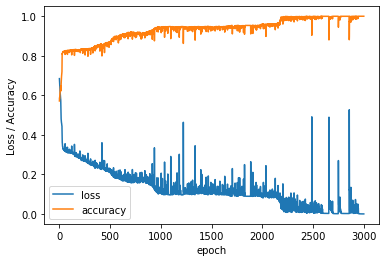

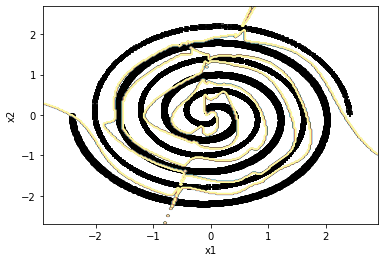

Wall time: 1min 48s


In [17]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None
    
# Generate training data
#x_trn, d_trn = twospirals(1500, 3, 0)
#x_trn, d_trn = twospirals(2500, 3, 0)
#x_trn, d_trn = twospirals(3500, 3, 0)
x_trn, d_trn = twospirals(4000, 3, 0)
#x_trn, d_trn = twospirals(4500, 3, 0)

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_trn.shape[1],         
         #'n_nod': [5,4,4,4],  #91 with 2500 points, 99.7 with 3500 points or 4000 points  
         #'n_nod': [7,5,4,4],  #99.9 with 3500 points or 4000 points  
         #'n_nod': [7,6,4,3],  #1.00 with 4000 points
         'n_nod': [6,6,4,3],  #1.00 with 4000 points
         'drop_nod': 0.0,                 
         'act_fun': 'tanh',  
         #'act_fun': 'relu',  
         'out_act_fun': 'sigmoid',          
         'opt_method': 'Adam',             
         'cost_fun': 'binary_crossentropy', 
         #'lr_rate': 0.01,        
         'lr_rate': 0.01,        
         'num_out' : 1 }                   

# Get the model
model_ex6 = mlp(**INPUT)

# Print a summary of the model
model_ex6.summary()

# Train the model
estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                      #epochs = 2000,
                      epochs = 3000,                
                      batch_size=100,  
                      #batch_size=200,  
                      verbose = 0)

# Call the stats function to print out statistics for the training
stats_class(x_trn, d_trn, 'Training', model_ex6)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
for k in estimator_ex6.history.keys():
    plt.plot(estimator_ex6.history[k], label = k) 
plt.legend(loc='best')

# Show the decision boundary
decision_b(x_trn, d_trn, model_ex6)


# The report!


### Name
Theodora Gaiceanu

### Introduction

In this assignment, the impact of the size of the network on the model performances has been analyzed. Also, the overfitting was reduced. L2 regularization has been used to control the complexity. Dropout techniques has been analyzed as well and it has been used as a way to reduce overfitting. In the end, some MLP models have been selected in order to solve best a few classification problems. All exercises have used MLP.

### Answers to questions

**Q1.**

   In all the experiments a network model with only one node was used.
    
   - 1st Training: Accuracy - 0.8500, Sensitivity - 0.8800, Specificity - 0.8200, Loss- 0.3283

   - 2nd Training: Accuracy - 0.8680, Sensitivity - 0.9060, Specificity - 0.8300, Loss - 0.2994

   - 3rd Training: Accuracy - 0.8400, Sensitivity - 0.8600, Specificity - 0.8200, Loss - 0.3278

   - 4th Training: Accuracy - 0.8710, Sensitivity - 0.9060, Specificity - 0.8360, Loss - 0.2953

   - 5th Training: Accuracy - 0.8400, Sensitivity - 0.8600, Specificity - 0.8200, Loss - 0.3279

   - 6th Training: Accuracy - 0.8700, Sensitivity - 0.9060, Specificity - 0.8340, Loss - 0.2964

   **Average accuracy: 0.8565**
    


**Q2.**

   **n_nod = [10]**
   
   - Learning rate = 0.9, epochs = 100, batch size = 25
   
   - Training: Accuracy - 0.9500, Sensitivity - 0.9600, Specificity - 0.9400, Loss - 0.1699
   
   - Validation: Accuracy - 0.8400, Sensitivity - 0.8840, Specificity - 0.7960, Loss - 1.0381
   
   The overfitting is high.

    
  
   **n_nod = [20], - THE BEST FOR TRAINING**
   
   - Learning rate = 0.9, epochs = 100, batch size = 50
   
   - Training: Accuracy - 0.9700, Sensitivity - 0.9600, Specificity - 0.9800, Loss - 0.0896
   
   - Validation: Accuracy - 0.8190, Sensitivity -  0.8460, Specificity - 0.7920, Loss - 0.9600
   
   The overfitting is also very high.
   
   
   The best accuracy for training is reached when using a model with only one hidden layer, with 20 nodes. Increasing both the learning rate and the batch size help increasing the performance for training. But the overfitting is very high. 
   
   

**Q3.**


   **n_nod = [2] - THE BEST FOR VALIDATION**
   
   - Learning rate: 0.7, Batch size: 50, epochs = 100
   
   - Training: Accuracy - 0.8600, Sensitivity - 0.8200, Specificity - 0.9000, Loss - 0.3162

   - Validation: Accuracy - 0.8770, Sensitivity - 0.8820, Specificity - 0.8720, Loss - 0.3252
   
   
   **n_nod = [3]**
   
   - Learning rate: 0.7, Batch size: 50, epochs = 100
   
   - Training: Accuracy - 0.8800, Sensitivity - 0.8200, Specificity - 0.9400, Loss - 0.2555

   - Validation: Accuracy - 0.8660, Sensitivity - 0.8420, Specificity - 0.8900, Loss - 0.3458


   The best performance for validation seems to be when using a netwotk with only one hidden layer and 2 nodes. Adding more nodes increases the overfitting. But this is not surprising, as the task is to separate two classes of point. Therefore, the network architecture should not be too complex in order to solve such a task. 
    

**Q4.** 
    
   **1 node**
   
   - Training: MSE - 0.4612596333, CorrCoeff - 0.7359210041
   
   - Validation: MSE - 0.6026171446, CorrCoeff - 0.6438794382
    
    
   **2 nodes**
   
   - Training: MSE - 0.3678096235, CorrCoeff - 0.8031811079
   
   - Validation: MSE - 0.5820765495, CorrCoeff - 0.6630823054
   
    
   **3 nodes**
   
   - Training: MSE - 0.3240809441, CorrCoeff - 0.8276619855
   
   - Validation: MSE - 0.5355252624, CorrCoeff - 0.7025432819
   
    
   **4 nodes**
   
   - Training: MSE - 0.2256102860, CorrCoeff - 0.8900350833
   
   - Validation: MSE - 0.4549972713, CorrCoeff - 0.7562159610
   
    
   **5 nodes**
   
   - Training: MSE - 0.2732929587, CorrCoeff - 0.8642259810
   
   - Validation: MSE - 0.5742587447, CorrCoeff - 0.6865627431
   
    
   **6 nodes**
   
   - Training: MSE - 0.1751337796, CorrCoeff - 0.9134289209
   
   - Validation: MSE- 0.4782482684, CorrCoeff - 0.7316203681
 
 
   **10 nodes**
   
   - Training: MSE - 0.1201333702, CorrCoeff  - 0.9471445554
   
   - Validation: MSE - 0.4152812660, CorrCoeff - 0.7800267025
    
   Analyzing the results above, 10 seems to be the optimal number of nodes. Even with 10 nodes, the overfitting is still high.
    
 
 **Q5.**
 
   **25 nodes, L2 regularization term - 0.01**
   
   - Training: MSE - 0.1973638684, CorrCoeff - 0.9337509328
   
   - Validation: MSE - 0.3769395351, CorrCoeff - 0.8238893175
   
   The result is better than the one obtained above. Also, the overfitting is reduced.
   
    
   **25 nodes, L2 regularization term - 0.1**
   
   - Training: MSE - 0.4048287868, CorrCoeff - 0.8050330320
   
   - Validation: MSE - 0.5341367722, CorrCoeff - 0.7248540740
   
   There are too little nodes and the regularization term is too big.
   

   **45 nodes, L2 regularization term - 0.1**
   
   - Training: MSE - 0.4615204930, CorrCoeff - 0.8082021199
   
   - Validation: MSE - 0.542577028, CorrCoeff - 0.7196562097
   
   The regularization term is too big, even if the number of nodes is increased.
   

   **45 nodes, L2 regularization term - 0.01**
   
   - Training: MSE - 0.1757596582, CorrCoeff - 0.9364883002
   
   - Validation: MSE - 0.3652721047, CorrCoeff - 0.8334818583
   
   The performance is even better.
   
    
   **55 nodes, L2 regularization term - 0.01**
   
   - Training: MSE - 0.1987464428, CorrCoeff - 0.9259292707
   
   - Validation: MSE - 0.4062432945, CorrCoeff - 0.8188317892
   
   The performance starts to decrease, so the number of nodes is too high.
   
    
   From the results above, the optimal combination is a model with 45 nodes and a L2 regularization term of 0.01. This result is better than the one obtained in Q4.
    
    
 
 **Q6.**
    
   **100 nodes, 0.2 dropout**
   
   - Training: MSE - 0.1966075450, CorrCoeff - 0.9544779904
   
   - Validation: MSE - 0.5127372146, CorrCoeff - 0.7088686556
   
    
   **100 nodes, 0.3 dropout**
   
   - Training: MSE - 0.2602528632, CorrCoeff - 0.9464993498
   
   - Validation: MSE - 0.5057321787, CorrCoeff - 0.7146893706


   **25 nodes, 0.2 dropout**
   
   - Training: MSE - 0.2415002286, CorrCoeff - 0.9262864121
   
   - Validation: MSE - 0.5092076063, CorrCoeff - 0.7116431820
   
    
   **25 nodes, 0.4 dropout**
   
   - Training: MSE - 0.3965383172, CorrCoeff - 0.8650535491
   
   - Validation: MSE - 0.5642620921, CorrCoeff - 0.6703127118
   
    
   **50 nodes, 0.3 dropout**
   
   - Trainig: MSE - 0.2774790525, CorrCoeff - 0.9191238386
   
   - Validation: MSE - 0.5195981264, CorrCoeff - 0.7050990509
    
    
    
   **200 nodes, 0.3 dropout**
   
   - Training: MSE - 0.2921239734, CorrCoeff - 0.9368697677
   
   - Validation: MSE - 0.4971791804, CorrCoeff - 0.7173455657
    
    
    
   **75 nodes, 0.3 dropout**
   
   - Training Data: MSE - 0.2557711303, CorrCoeff - 0.9274588419
   
   - Validation Data: MSE - 0.4939989150, CorrCoeff - 0.7200118995
   
    
    
   **300 nodes, 0.2 dropout**
   
   - Training Data: MSE - 0.2119495124, CorrCoeff - 0.9468096010
   
   - Validation Data: MSE - 0.4843721390, CorrCoeff - 0.7254345781


   As it can be observed, the best performance is when using a model with 300 nodes and 0.2 dropout. But still, the MSE for validation data is higher than the MSE from Q4 and Q5.
    
    
    
**Q7.**

   **n_nod = [20,20]**
   
   *Validation performance: log_loss - 0.3980, accuracy - 0.9051*
   
   *Test performance: log_loss - 0.3783, accuracy - 0.9074*
   
   **n_nod = [22,22]**
   
   *Validation performance: log_loss - 0.3699, accuracy - 0.9169*
   
   *Test performance: log_loss - 0.3216, accuracy - 0.9191*
   
   **n_nod  = [24,24]**
   
   *Validation performance: log_loss - 0.3698, accuracy - 0.9257*
   
   *Test performance: log_loss - 0.3274, accuracy - 0.9200*


   Since the problem is a multiclass classification problem, I chose softmax as the output activation function and categorical crossentropy as the cost function. For the other nodes I used the Rectifier function (it gave slighltly better results than the linear activation function). I lowered the learning rate, as I observed from the experiments that a lower learning rate improved the accuracy. Morover, I added more nodes and more hidden layers because the problem is complex, so it needs several parameters to perform well. The best combination found has 2 hidden layers, 24 nodes for the first hidden layer, and 24 for the second one. I also used dropout in order to prevent the overfitting. I used a probability of 40% to drop a node (same probability for all layers).


**Q8.**

   One can however have a situation where the loss increases for the validation data but the accuracy stays constant (why?). Given this situation, what would be your criteria to select the best model?
   
   The accuracy is not as sensitive to changes as one always uses a threshold to determine whether an input should correspond to one label or another. But the loss function actually computes the difference between the true output and the predicted one, so it is more sensitive to changes. Given this situation, I would select the model by inspecting the loss function. Because if a model has high accuracy, but the loss is increasing, it means that the model is overfitted. Therefore, one can first select the models that gave about the best/highest accuracy. Afterwards, the final model is selected based on the loss, considering only the most accurate models. 
 

**Q9.**
    
   (a) First, I splitted the data into training and testing, using 70% of the data for training and the rest for testing. After that, I normalized x_trn, x_val and x_tst. 
   
   The best size for the model is the network architecture with two layers that has 25 nodes for the first layers, 24 nodes for the second one. In order to prevent the overfitting I used a dropout percent of 0.4, meaning that the model keeps 60% of the nodes during training. The activation function used is Sigmoid in this case. As it is a multiclass classification problem, the output activation function is Softmax. Also, the cost function used is categorical crossentropy (classification problem). I noticed the best performance was reached when using smaller learning rates, so the model has a learning rate of 0.01. 
   
   
    
   (b) When selecting the optimal model, accuracy for both the entire model and for each class are revelant. That is because I think that it is important to have a network that can actually learn how to detect cases of class 2 also. 
   
   Another way to select the model is to do K-fold cross validation with stratified partitioning. Since there are not so many representatives of the second class, the validation or training set could not have any representative of the second class, in some situations. But, by doing stratified partitioning, the balance between the three classes is preserved in every fold.
   
   Also, the F1 score is a good metric. It is the harmonic mean of the precision and recall (the ratio of the actual positives that were correctly predicted). The higher it is, the better.
   
   $F_1 = \frac{2*precision*recall}{precision + recall}$
   
   The model presented above has the following performances:
       
     
   **n_nod = [25, 24]**
    
    Training: 
    log_loss - 0.6386
    accuracy - 0.7353
              precision    recall  f1-score   support
     class 1       0.71      0.94      0.81       245
     class 2       1.00      0.33      0.50        33
     class 3       0.80      0.45      0.58       130
    accuracy                           0.74       408
    macro avg       0.84      0.58      0.63       408
    weighted avg       0.76      0.74      0.71       408
    
    Validation:
    log_loss:    0.7300
    accuracy:    0.7216 
              precision    recall  f1-score   support
     class 1       0.69      0.98      0.81       100
     class 2       0.80      0.27      0.40        15
     class 3       0.89      0.41      0.56        61
    accuracy                           0.72       176
    macro avg       0.79      0.55      0.59       176
    weighted avg       0.77      0.72      0.69       176
    
    Testing:
    log_loss:    0.8156
    accuracy:    0.6308 
              precision    recall  f1-score   support
     class 1       0.63      0.92      0.75       115
     class 2       1.00      0.25      0.40        16
     class 3       0.57      0.20      0.30        64
    accuracy                           0.63       195
    macro avg       0.73      0.46      0.48       195
    weighted avg       0.64      0.63      0.57       195
    
     
**Q10.**

   **4000 datapoints, 3000 epochs, model with 4 hidden layers - 5 nodes in the first layer, 4 nodes in each of the remaining layers, 84 trainable parameters**
   
   - Accuracy        0.9971
   
   - Sensitivity     0.9970
   
   - Specificity     0.9972
   
   - Loss            0.0102
   
    
   **4000 datapoints, 3000 epochs, model with 4 hidden layers - 7 nodes in the first layer, 5 nodes in the second layer, 4 nodes in each of the last two layers, 110 trainable parameters**
   
   - Accuracy        0.9996
   
   - Sensitivity     0.9998
   
   - Specificity     0.9995
   
   - Loss            0.0013
    
    
   **4000 datapoints, 3000 epochs, model with 4 hidden layers - 7 nodes in the first layer, 6 nodes in the second layer, 4 nodes in the third layer and 3 nodes in the last layer, 116 trainable parameters**
   
   - **Accuracy        1.0000**
   
   - Sensitivity     1.0000
   
   - Specificity     1.0000
   
   - Loss            0.0001
   
   But for this model the loss function fluctuates a lot. But changing the leaning rate to any other value than 0.01 causes a decrease in the accuracy.
    
    
   **4000 datapoints, 3000 epochs, model with 4 hidden layers - 6 nodes in each of the first two layers, 4 nodes in the third layer, 3 nodes in the last layer, 107 trainable parameters**
   
   - **Accuracy        1.0000**
   
   - Sensitivity     1.0000
   
   - Specificity     1.0000
   
   - Loss            0.0001
   
   The advantages of this model are that it has less trainable parameters than the model above, and its loss function does not fluctuate that much.
    
    

    
### Summary

   When chosing the best model for solving a certain task, one must always look at the validation/ testing performances. Certain measures need to be taken in order to prevent the overfitting.
    
   First of all, it is always good to start with a small size for the network and analyze the model performances. If they are not satisfying enough, one can increase the size, while taking into consideration the validation results. 
    
   Morover, it is a good idea to start with a smaller learning rate and increase it if the loss function does not decrease for a big number of epochs or if the model tends to overfit. 
    
   When taking into consideration the overfitting, one should always do some additional steps in order to prevent it. The simplest one is to reduce the number of epochs, but in some cases, for complex problems, a big number of epochs may actually be necessary. Therefore, a more robust solution is to use either a regularization term or dropout. But, for complex problem dropout is more efficient. Anyway, one should notice that more trainable parameters are required when using dropout. 
    
   What is more, when analyzing the overfitting, one should look also on the loss function evolution, not just at the accuracy evolution. 
    
   Last but not least, in order to obtain good performances for a model, one should have enough data available. 
  